## Pembuatan SNA

In [30]:
import pandas as pd

filename = "scraptwt_uktitb_3bulan.csv"

file_path = f"data datmin ii/{filename}"

df = pd.read_csv(file_path, delimiter=",")

display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1839203589933379880,Thu Sep 26 23:52:16 +0000 2024,0,@VeritasArdentur Kalo kita ngomongin kampus sw...,1839452961983853033,NaN,VeritasArdentur,in,NaN,0,0,0,https://x.com/hitlops/status/1839452961983853033,1549044884166049792,hitlops
1,1839445805000003795,Thu Sep 26 23:23:49 +0000 2024,0,dalam laporan keuangan ya memang harus ditulis...,1839445805000003795,NaN,NaN,in,"London, England",0,0,0,https://x.com/rhgps/status/1839445805000003795,1508865958395486208,rhgps
2,1839445621637550577,Thu Sep 26 23:23:06 +0000 2024,7,Usai Diprotes ITB Tawarkan Kerja Paruh Waktu b...,1839445621637550577,NaN,NaN,in,Indonesia,0,0,1,https://x.com/tempodotco/status/18394456216375...,18129942,tempodotco
3,1839444430484599136,Thu Sep 26 23:18:22 +0000 2024,0,msh ada yg bilang ini beasiswa pdhl ini penggo...,1839444430484599136,NaN,NaN,in,"Langenburg No. 181, Saskatchew",0,0,0,https://x.com/mineemime/status/183944443048459...,1429267310708084738,mineemime
4,1839355730757034102,Thu Sep 26 23:10:22 +0000 2024,0,@DraftAnakITB @itbanonfess @satpam_itb Semoga ...,1839442420792254740,NaN,DraftAnakITB,in,162'24,0,0,0,https://x.com/nicotinepana/status/183944242079...,1703266971201236992,nicotinepana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1805295408715010067,Mon Jun 24 17:42:20 +0000 2024,17,problematika top 3 ptn indo ui: lama ngasih pe...,1805295408715010067,NaN,NaN,in,106'23,1,0,0,https://x.com/namedlatte/status/18052954087150...,1331792174762000386,namedlatte
535,1805264421109088646,Mon Jun 24 15:41:28 +0000 2024,0,@naostudys Karena Jamal (jaket mahal) tau send...,1805264988799730165,NaN,naostudys,in,NaN,0,2,0,https://x.com/mnyhyst/status/1805264988799730165,1388503721294761987,mnyhyst
536,1805263608458383690,Mon Jun 24 15:35:59 +0000 2024,0,UKT tertinggi maba ITS tahun ini sama dgn ITB ...,1805263608458383690,NaN,NaN,in,Indonesia,0,0,0,https://x.com/audityasutarto/status/1805263608...,93788107,audityasutarto
537,1805124127784915015,Mon Jun 24 15:07:06 +0000 2024,0,@eswaeidiefes Di pukul rata njir ukt itb,1805256340069319033,NaN,eswaeidiefes,in,she/her.,0,0,0,https://x.com/wantITsoBAD/status/1805256340069...,1352534250436792320,wantITsoBAD


In [2]:

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 539.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

df = df.replace(np.nan, "")
G_mention = nx.DiGraph()

for index, row in df.iterrows():
    author = f"@{row['username']}" 
    text = row['full_text']

    mentions = set(re.findall(r"@(\w+)", text))  

    for mention in mentions:
        mention = f"@{mention}"  
        if G_mention.has_edge(author, mention):
            G_mention[author][mention]['weight'] += 1 
        else:
            G_mention.add_edge(author, mention, weight=1)  



In [4]:
import networkx as nx
from operator import itemgetter

graph = G_mention  # Use your defined graph here

graph_centrality = nx.degree_centrality(graph)
max_de = max(graph_centrality.items(), key=itemgetter(1))

graph_closeness = nx.closeness_centrality(graph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

graph_betweenness = nx.betweenness_centrality(graph, normalized=True, endpoints=True)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))

print(f"Max Degree Centrality: {max_de}")
print(f"Max Closeness Centrality: {max_clo}")
print(f"Max Betweenness Centrality: {max_bet}")


Max Degree Centrality: ('@VeritasArdentur', 0.06164383561643835)
Max Closeness Centrality: ('@VeritasArdentur', 0.06164383561643835)
Max Betweenness Centrality: ('@hujandanjuni', 0.00025129739585768386)


C:\Users\AURA\AppData\Local\Temp\ipykernel_15056\966881763.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Number of Mentions")


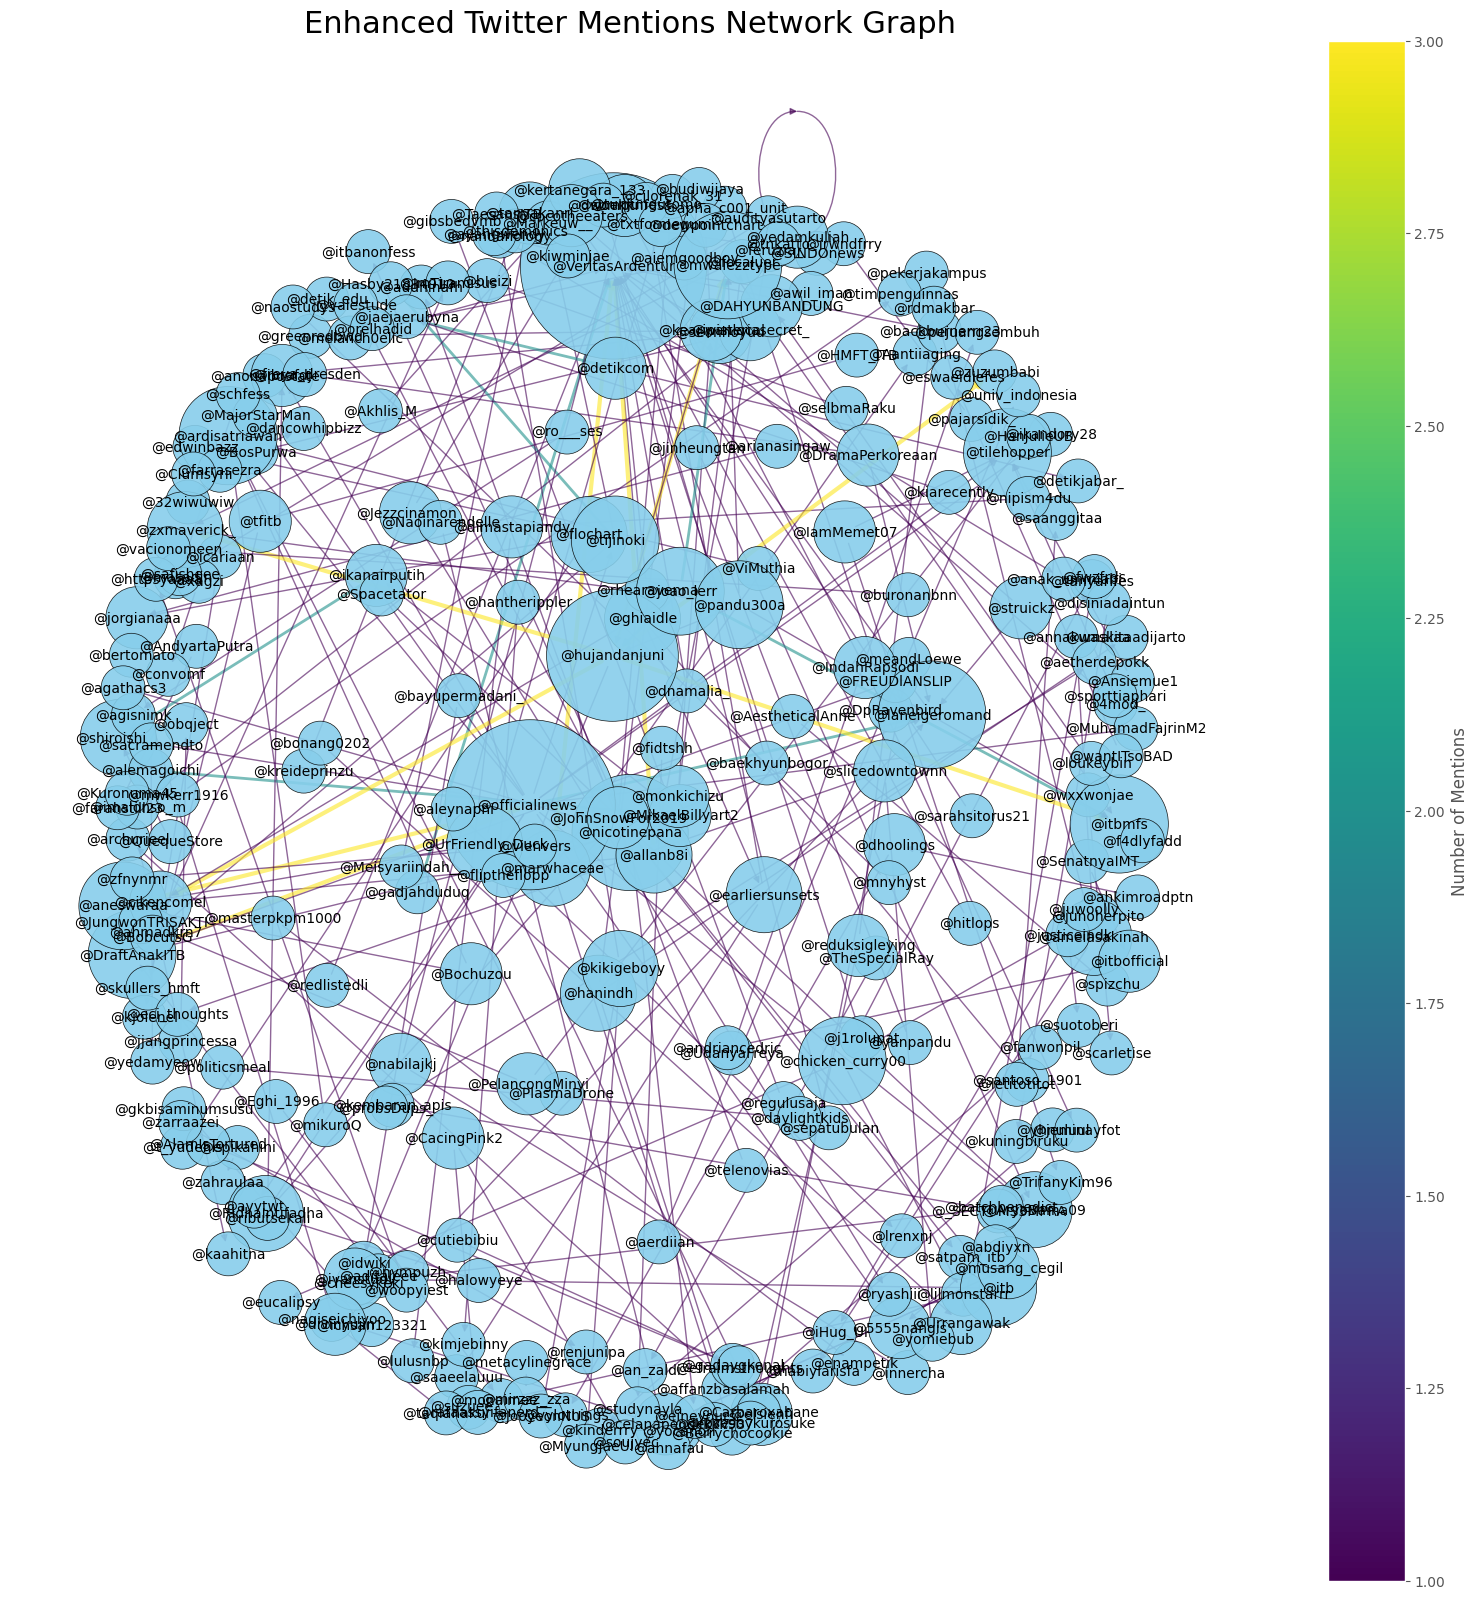

In [5]:
G = G_mention
pos = nx.spring_layout(G, k=0.6, iterations=50)  # Adjust for better spacing

plt.figure(figsize=(20, 20))
plt.style.use("ggplot")

node_size = [1000 * nx.degree(G, node) for node in G]
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue', alpha=0.9, edgecolors="k")

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_weights, width=edge_weights, edge_cmap=plt.cm.viridis, alpha=0.6)  # Use multicolor gradient

nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_family="sans-serif")

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))  # Multicolor gradient
sm.set_array([])
plt.colorbar(sm, label="Number of Mentions")

plt.title("Enhanced Twitter Mentions Network Graph", fontsize=22)

plt.axis("off")

plt.show()

## Clustering Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      539 non-null    int64 
 1   created_at               539 non-null    object
 2   favorite_count           539 non-null    int64 
 3   full_text                539 non-null    object
 4   id_str                   539 non-null    int64 
 5   image_url                539 non-null    object
 6   in_reply_to_screen_name  539 non-null    object
 7   lang                     539 non-null    object
 8   location                 539 non-null    object
 9   quote_count              539 non-null    int64 
 10  reply_count              539 non-null    int64 
 11  retweet_count            539 non-null    int64 
 12  tweet_url                539 non-null    object
 13  user_id_str              539 non-null    int64 
 14  username                 539 non-null    o

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import re

In [15]:
def clean_text(text):
    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'@\w+', '', text)

    text = re.sub(r'#\w+', '', text)

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text_list = []

for index, row in df.iterrows():
    cleaned_text = clean_text(row['full_text'])
    cleaned_text_list.append(cleaned_text)  # Append cleaned text to the list

cleaned_text_list


['kalo kita ngomongin kampus swasta okelah gue setuju tapi itb ini ptn harusnya lebih accessible lebih inklusif dari segi biaya lagian penyesuaian ukt sesuai kondisi ekonomi masing toh udah jadi hak mahasiswa',
 'dalam laporan keuangan ya memang harus dituliskan sebagai penerimaan kemudian disalurkan ke mahasiswa dimasukin kepos pengeluaran lagi nah yang jadi masalah term beasiswa ini dipake itb kecampur antara potongan ukt dan beasiswa dari badanperusahaan',
 'usai diprotes itb tawarkan kerja paruh waktu bagi penerima beasiswa ukt sebagai pilihan',
 'msh ada yg bilang ini beasiswa pdhl ini penggolongan ukt doang yaampun kirain yg ngira gini org non itb doang',
 'semoga berpihak sm mahasiswa ukt diturunin biar ga dipukul rata semua',
 'tapi gan keringanan ukt itu emang haknya mahasiswa bukan bantuan dari itb salahkah mahasiswa nuntut kampus untuk dapat haknya tanpa dipaksa melakukan timbal balik dengan ancaman keringanannya akan dievaluasi bahkan dicabut itb juga gak berniat untuk meny

In [16]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stop_word_remover = factory.create_stop_word_remover()

list_bersih_stop = []

for cleaned_text in cleaned_text_list:
    # Menghapus stopwords dari teks
    cleaned_text_no_stopwords = stop_word_remover.remove(cleaned_text)
    list_bersih_stop.append(cleaned_text_no_stopwords)  # Append ke list


# Menampilkan hasil
list_bersih_stop

['kalo ngomongin kampus swasta okelah gue setuju itb ptn harusnya lebih accessible lebih inklusif segi biaya lagian penyesuaian ukt sesuai kondisi ekonomi masing udah jadi hak mahasiswa',
 'laporan keuangan memang dituliskan penerimaan kemudian disalurkan mahasiswa dimasukin kepos pengeluaran nah jadi masalah term beasiswa dipake itb kecampur potongan ukt beasiswa badanperusahaan',
 'usai diprotes itb tawarkan kerja paruh waktu penerima beasiswa ukt pilihan',
 'msh yg bilang beasiswa pdhl penggolongan ukt doang yaampun kirain yg ngira gini org non itb doang',
 'semoga berpihak sm mahasiswa ukt diturunin biar ga dipukul rata semua',
 'gan keringanan ukt emang haknya mahasiswa bukan bantuan itb salahkah mahasiswa nuntut kampus dapat haknya dipaksa melakukan timbal balik ancaman keringanannya dievaluasi bahkan dicabut itb gak berniat menyediakan surat kerja',
 'moga temen itb diberi jalan keluar permasalahan ukt',
 'setujuu gw dulu kuliah full bayar jt mana pas tahun gw masuk baru banget 

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()


list_bersih_stem = []

for text in list_bersih_stop:
    # Menghapus stopwords dari teks
    stemmed_text = stemmer.stem(text)
    list_bersih_stem.append(stemmed_text)


# Menampilkan hasil
list_bersih_stem

['kalo ngomongin kampus swasta oke gue tuju itb ptn harus lebih accessible lebih inklusif segi biaya lagi sesuai ukt sesuai kondisi ekonomi masing udah jadi hak mahasiswa',
 'lapor uang memang tulis terima kemudian salur mahasiswa dimasukin pos keluar nah jadi masalah term beasiswa dipake itb campur potong ukt beasiswa badanperusahaan',
 'usai protes itb tawar kerja paruh waktu terima beasiswa ukt pilih',
 'msh yg bilang beasiswa pdhl golong ukt doang yaampun kirain yg ngira gin org non itb doang',
 'moga pihak sm mahasiswa ukt diturunin biar ga pukul rata semua',
 'gan ringan ukt emang hak mahasiswa bukan bantu itb salah mahasiswa nuntut kampus dapat hak paksa laku timbal balik ancam ringan evaluasi bahkan cabut itb gak niat sedia surat kerja',
 'moga temen itb beri jalan keluar masalah ukt',
 'setujuu gw dulu kuliah full bayar jt mana pas tahun gw masuk baru banget alih ukt jt per semester dinaikin jdi jt per semester the point is banyak orang yg otak lebih pantas itb tpi gara reini 

In [18]:
from gensim.models import Word2Vec
from sklearn import cluster
import numpy as np


sentences = [doc.split() for doc in list_bersih_stem]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in model.wv.key_to_index]
    return np.mean(model.wv[doc], axis=0) if doc else np.zeros(model.vector_size)

X = np.array([document_vector(doc.split()) for doc in list_bersih_stem])

print(X.shape)  


(539, 100)


In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_range = range(2, 11) 

from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Identify the optimal number of clusters
optimal_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
optimal_silhouette_score = max(silhouette_scores)

print(f'Optimal number of clusters: {optimal_n_clusters}')
print(f'Silhouette Score: {optimal_silhouette_score}')



c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

Optimal number of clusters: 2
Silhouette Score: 0.6005740761756897


c:\Users\AURA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


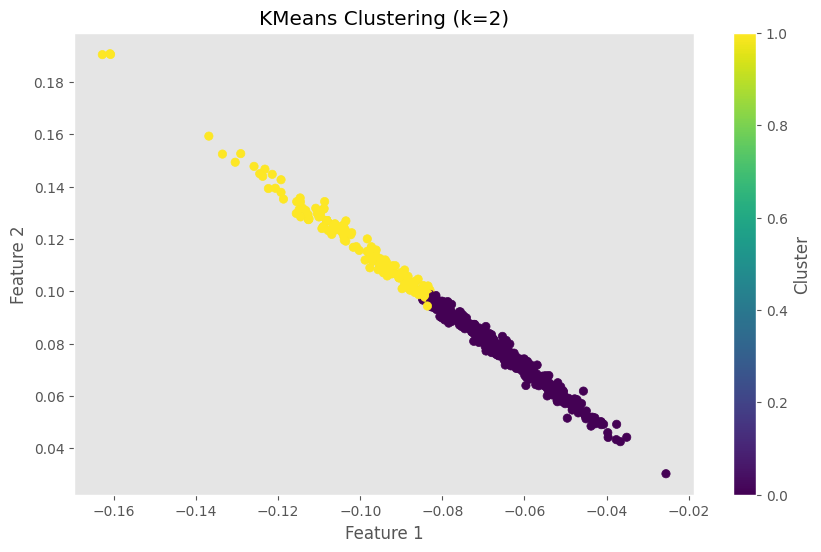

In [20]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'KMeans Clustering (k={optimal_n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


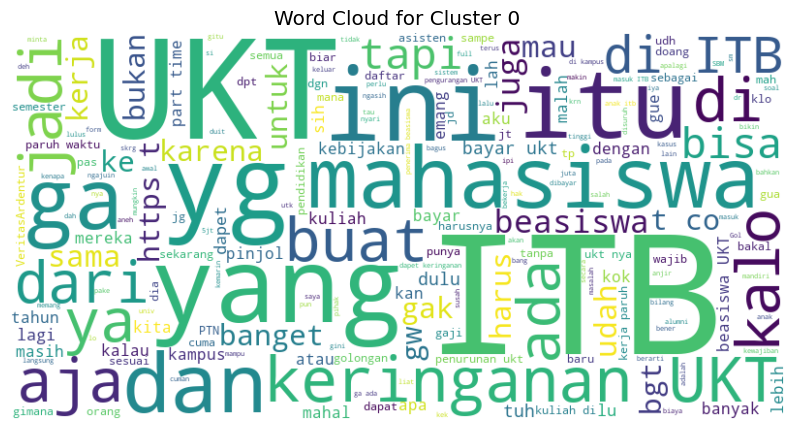

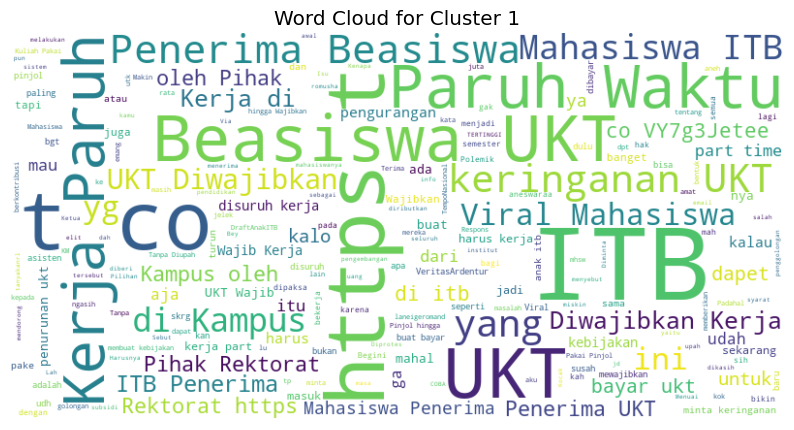

In [21]:
from wordcloud import WordCloud

for cluster in range(optimal_n_clusters):
    cluster_text = ' '.join(df.loc[labels == cluster, 'full_text'])  # Replace with your column name
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()


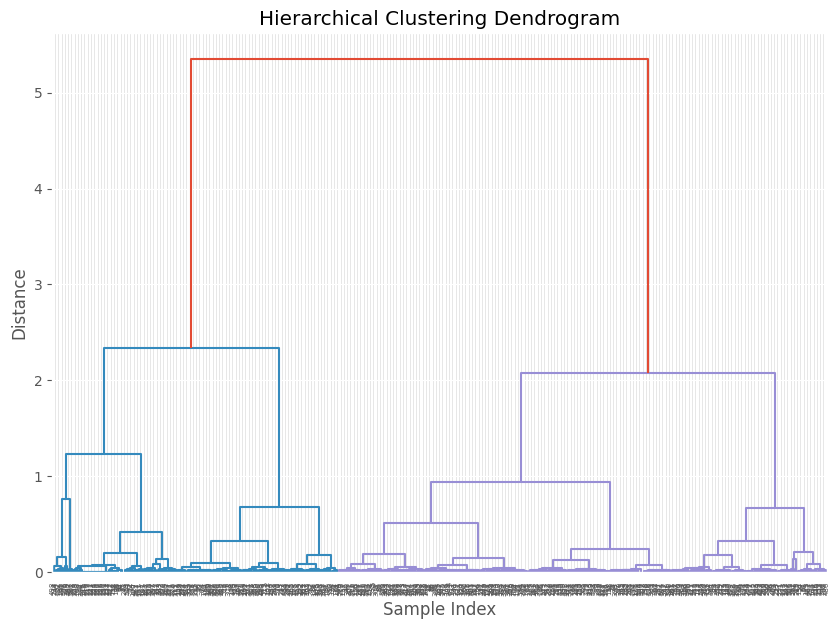

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud


linked = linkage(X, method='ward') 
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [27]:
max_d = 5
clusters = fcluster(linked, max_d, criterion='distance')
print(clusters)

# Calculate silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score for hierarchical clustering: {silhouette_avg}')


[1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 2 2 2 1
 1 2 1 2 2 1 1 2 2 1 2 1 1 2 2 2 1 2 1 1 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 1 1
 1 2 2 1 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1
 2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 2 2 1 2 1 2 1 1 1 2 1
 2 2 1 2 2 1 1 2 1 1 2 1 2 2 1 1 2 2 1 1 1 2 1 1 2 2 2 2 1 1 2 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 2 2 2 2 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 2 1 2 2 2 2 2 2 1 2 1 1 2 1 1 1
 1 1 1 2 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 2 1 1 2 2 1 2
 2 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 2 2 2 2 1
 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1
 1 2 1 1 2 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 2 2 1 2 1 1 1
 1 2 2 1 2 1 2 2 1 1 1 1 

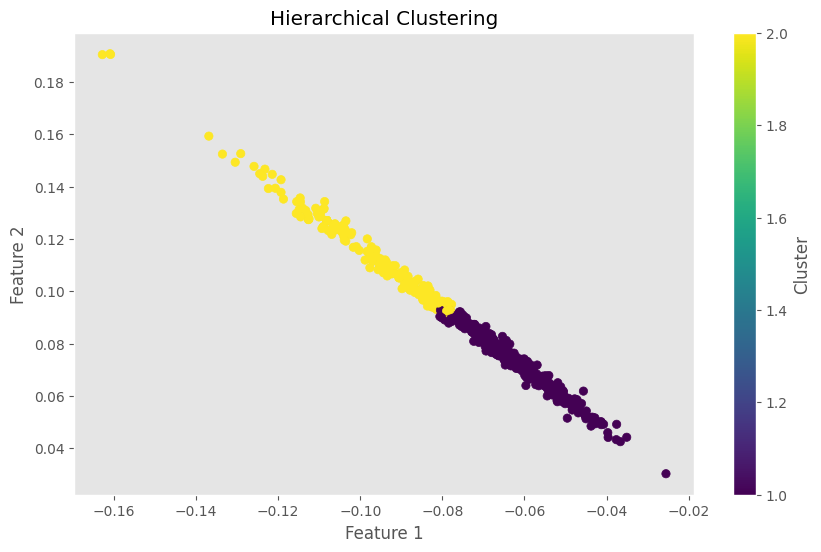

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

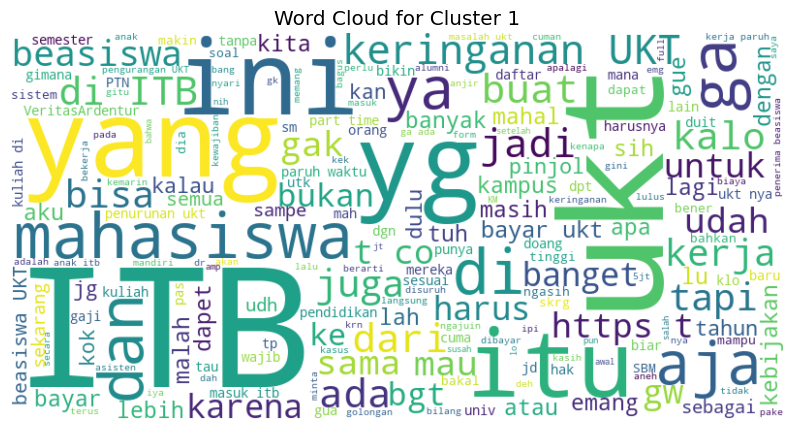

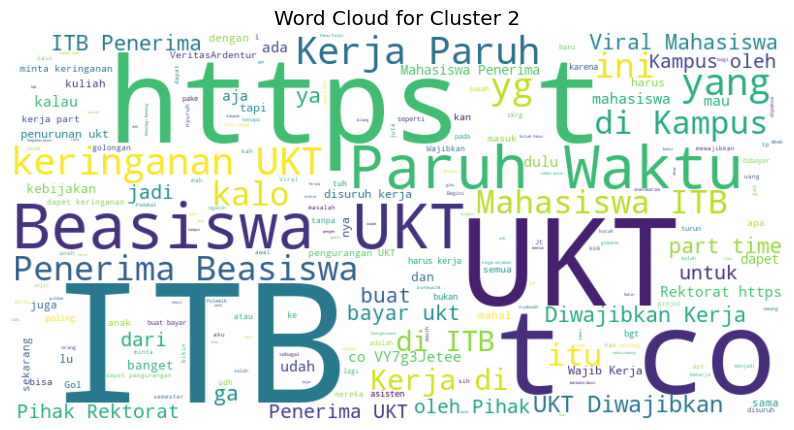

In [29]:
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    cluster_text = ' '.join(df.loc[clusters == cluster, 'full_text'])  # Replace with your column name
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()


## To Gephi

In [23]:
df_mention = nx.to_pandas_edgelist(G)
df_mention.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  222 non-null    object
 1   target  222 non-null    object
 2   weight  222 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.3+ KB


In [24]:
df_mention.to_csv("mentionuktitb01.csv", index = False)